# Escopo

## Variáveis

## Target

## Dataset

## Modelos testados
- Linear Simples
- Linear Multipla
- Random Forest
- KNN

# Install All Libs

In [2]:
# pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
# pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
# pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


# Import

## import default

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Import SKLearn

In [7]:
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# Cross-Validation models.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [9]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
sns.set()

# Import Dataset

In [10]:
insurance_dataset = pd.read_csv('./data/insurance_original.csv', decimal=',', sep=';')

# Regressão Linear

## View Básica
- view dataset (head)
- view qtd. Rows and Coolumns

In [11]:
# View Dataset
insurance_dataset.head()

,idade,sexo,imc,filhos,fumante,regiao,encargos,amigos,inimigos,chips,fritas,miojo,comportamento
0,19,feminino,NaN,0,sim,sudoeste,16884.92400,5,3,7,5,3,6
1,18,masculino,33.770,1,nao,sudeste,1725.55230,0,1,4,4,4,3
2,28,masculino,33.000,3,nao,sudeste,4449.46200,9,3,5,2,1,3
3,33,masculino,22.705,0,nao,noroeste,21984.47061,5,10,4,3,2,4
4,32,masculino,28.880,0,nao,noroeste,3866.85520,4,3,4,4,1,7


In [12]:
# View Qtd. Rows and Columns
insurance_dataset.shape

print(f'esse dataset tem {insurance_dataset.shape[0]} linhas e {insurance_dataset.shape[1]} colunas')

esse dataset tem 1338 linhas e 13 colunas


In [13]:
# About data
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idade          1338 non-null   int64  
 1   sexo           1338 non-null   object 
 2   imc            1327 non-null   float64
 3   filhos         1338 non-null   int64  
 4   fumante        1338 non-null   object 
 5   regiao         1338 non-null   object 
 6   encargos       1338 non-null   float64
 7   amigos         1338 non-null   int64  
 8   inimigos       1338 non-null   int64  
 9   chips          1338 non-null   int64  
 10  fritas         1338 non-null   int64  
 11  miojo          1338 non-null   int64  
 12  comportamento  1338 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 136.0+ KB


In [14]:
#about exist null
insurance_dataset.isnull().sum()

idade             0
sexo              0
imc              11
filhos            0
fumante           0
regiao            0
encargos          0
amigos            0
inimigos          0
chips             0
fritas            0
miojo             0
comportamento     0
dtype: int64

In [15]:
#Statistics Basic Info 
insurance_dataset.describe()

,idade,imc,filhos,encargos,amigos,inimigos,chips,fritas,miojo,comportamento
count,1338.000000,1327.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,40.670404,30.667841,1.094918,13270.422265,4.933483,4.905830,3.955157,4.068012,4.026906,3.973842
std,34.784427,6.103216,1.205493,12110.011237,3.198855,3.137599,1.985231,1.972665,1.960536,1.991020
min,-3.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,26.250000,26.302500,0.000000,4740.287150,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,39.000000,30.400000,1.000000,9382.033000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000
75%,51.000000,34.687500,2.000000,16639.912515,8.000000,8.000000,6.000000,6.000000,6.000000,6.000000
max,999.000000,53.130000,5.000000,63770.428010,10.000000,10.000000,7.000000,7.000000,7.000000,7.000000


In [16]:
# view dupliacted rows
insurance_dataset.duplicated().sum()

0

In [17]:
#existe uma linha duplicada
linhas_duplicadas = insurance_dataset[insurance_dataset.duplicated(keep=False)]

# Exibir as linhas duplicadas(dados iguais)
print(linhas_duplicadas)

Empty DataFrame
Columns: [idade, sexo, imc, filhos, fumante, regiao, encargos, amigos, inimigos, chips, fritas, miojo, comportamento]
Index: []


In [18]:
#Visualizar as Colunas
insurance_dataset.columns

Index(['idade', 'sexo', 'imc', 'filhos', 'fumante', 'regiao', 'encargos',
       'amigos', 'inimigos', 'chips', 'fritas', 'miojo', 'comportamento'],
      dtype='object')

## Descrição das Colunas
- 'idade'= 
- 'sexo'=
- 'imc'=
- 'filhos'=
- 'fumante'=
- 'regiao'=
- 'encargos'=
- 'amigos'=
- 'inimigos'=
- 'chips'=
- 'fritas'=
- 'miojo'=
- 'comportamento'=

In [19]:
# view das colunas
# for coluna in insurance_dataset.columns :
#     print(insurance_dataset.value_counts(coluna))

### Charges(encargos) x Age(idade)

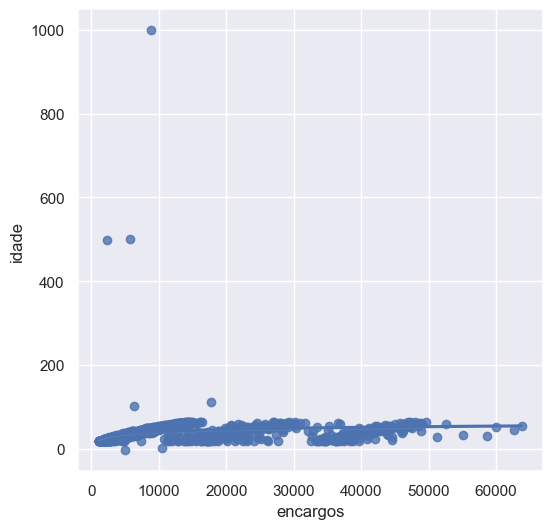

In [20]:
plt.figure(figsize=(6,6))
sns.regplot(data=insurance_dataset, x="encargos", y="idade", logx=True)
plt.show() 

### Age

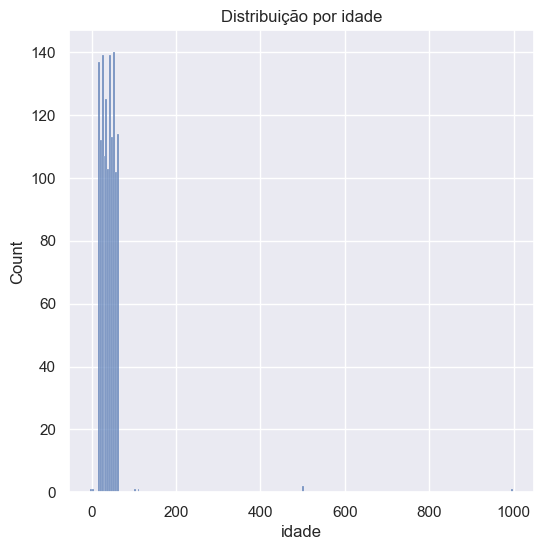

In [21]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['idade'])
plt.title('Distribuição por idade')
plt.show()

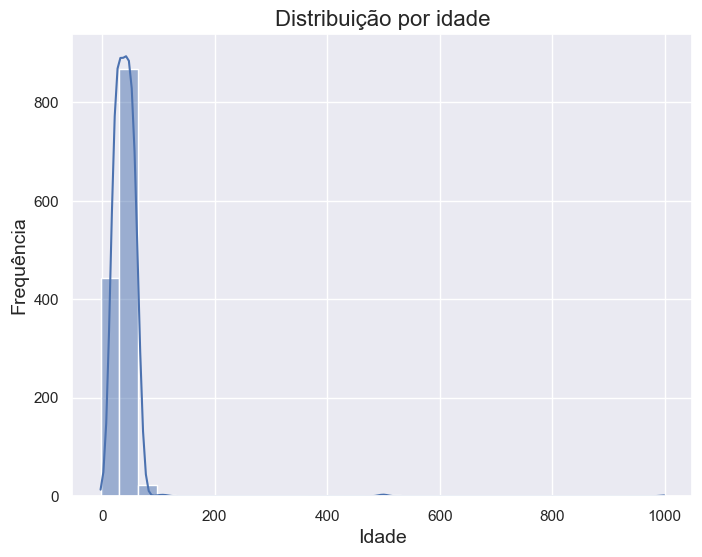

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(insurance_dataset['idade'], bins=30, kde=True)
plt.title('Distribuição por idade', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.grid(True)
plt.show()

### sexo

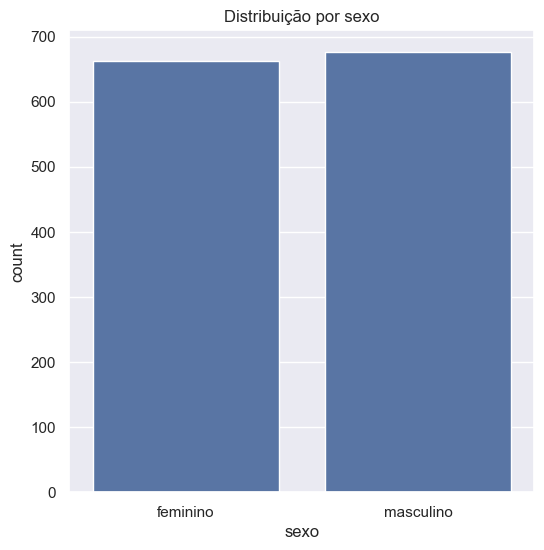

In [23]:

plt.figure(figsize=(6,6))
sns.countplot(x='sexo', data=insurance_dataset)
plt.title('Distribuição por sexo')
plt.show()

In [24]:
insurance_dataset['sexo'].value_counts()

sexo
masculino    676
feminino     662
Name: count, dtype: int64

### IMC

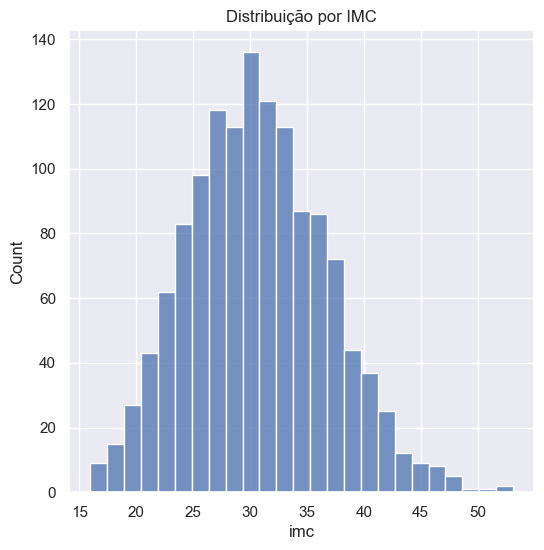

In [25]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['imc'])
plt.title('Distribuição por IMC')
plt.show()

### Children

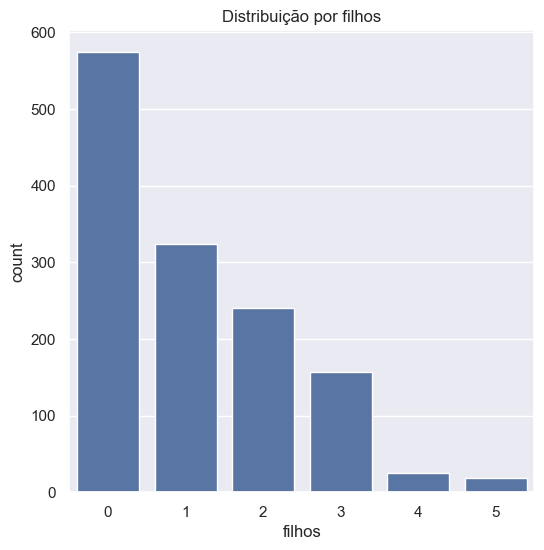

In [26]:
plt.figure(figsize=(6,6))
sns.countplot(x='filhos', data=insurance_dataset)
plt.title('Distribuição por filhos')
plt.show()

In [27]:
# totais de registros por qtd de filhos
insurance_dataset['filhos'].value_counts()

filhos
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

### Smoker

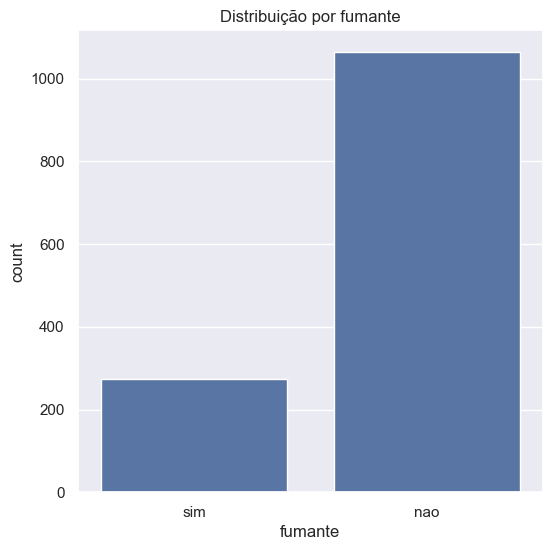

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x='fumante', data=insurance_dataset)
plt.title('Distribuição por fumante')
plt.show()

In [29]:
insurance_dataset['fumante'].value_counts()

fumante
nao    1064
sim     274
Name: count, dtype: int64

### Região

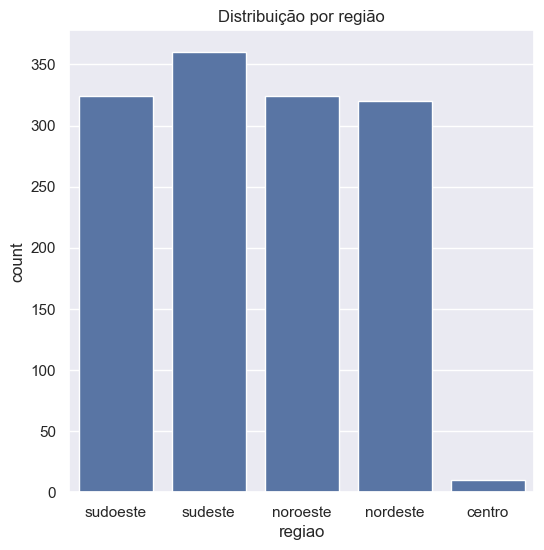

In [30]:
# região
plt.figure(figsize=(6,6))
sns.countplot(x='regiao', data=insurance_dataset)
plt.title('Distribuição por região')
plt.show()


In [31]:
insurance_dataset['regiao'].value_counts()

regiao
sudeste     360
sudoeste    324
noroeste    324
nordeste    320
centro       10
Name: count, dtype: int64

### Encargos

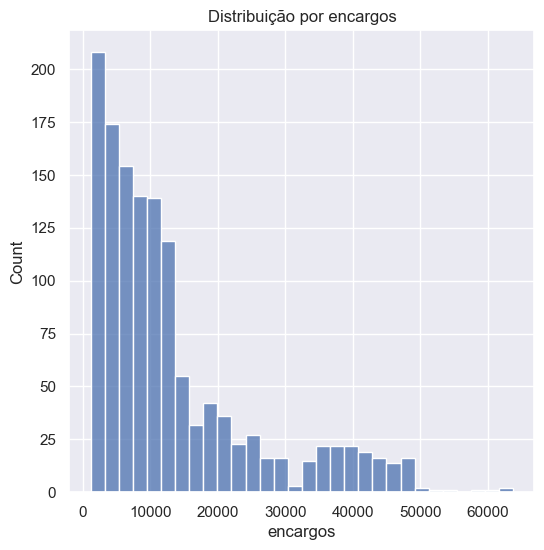

In [32]:

# Valores de encargos
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['encargos'])
plt.title('Distribuição por encargos')
plt.show()

### Geral

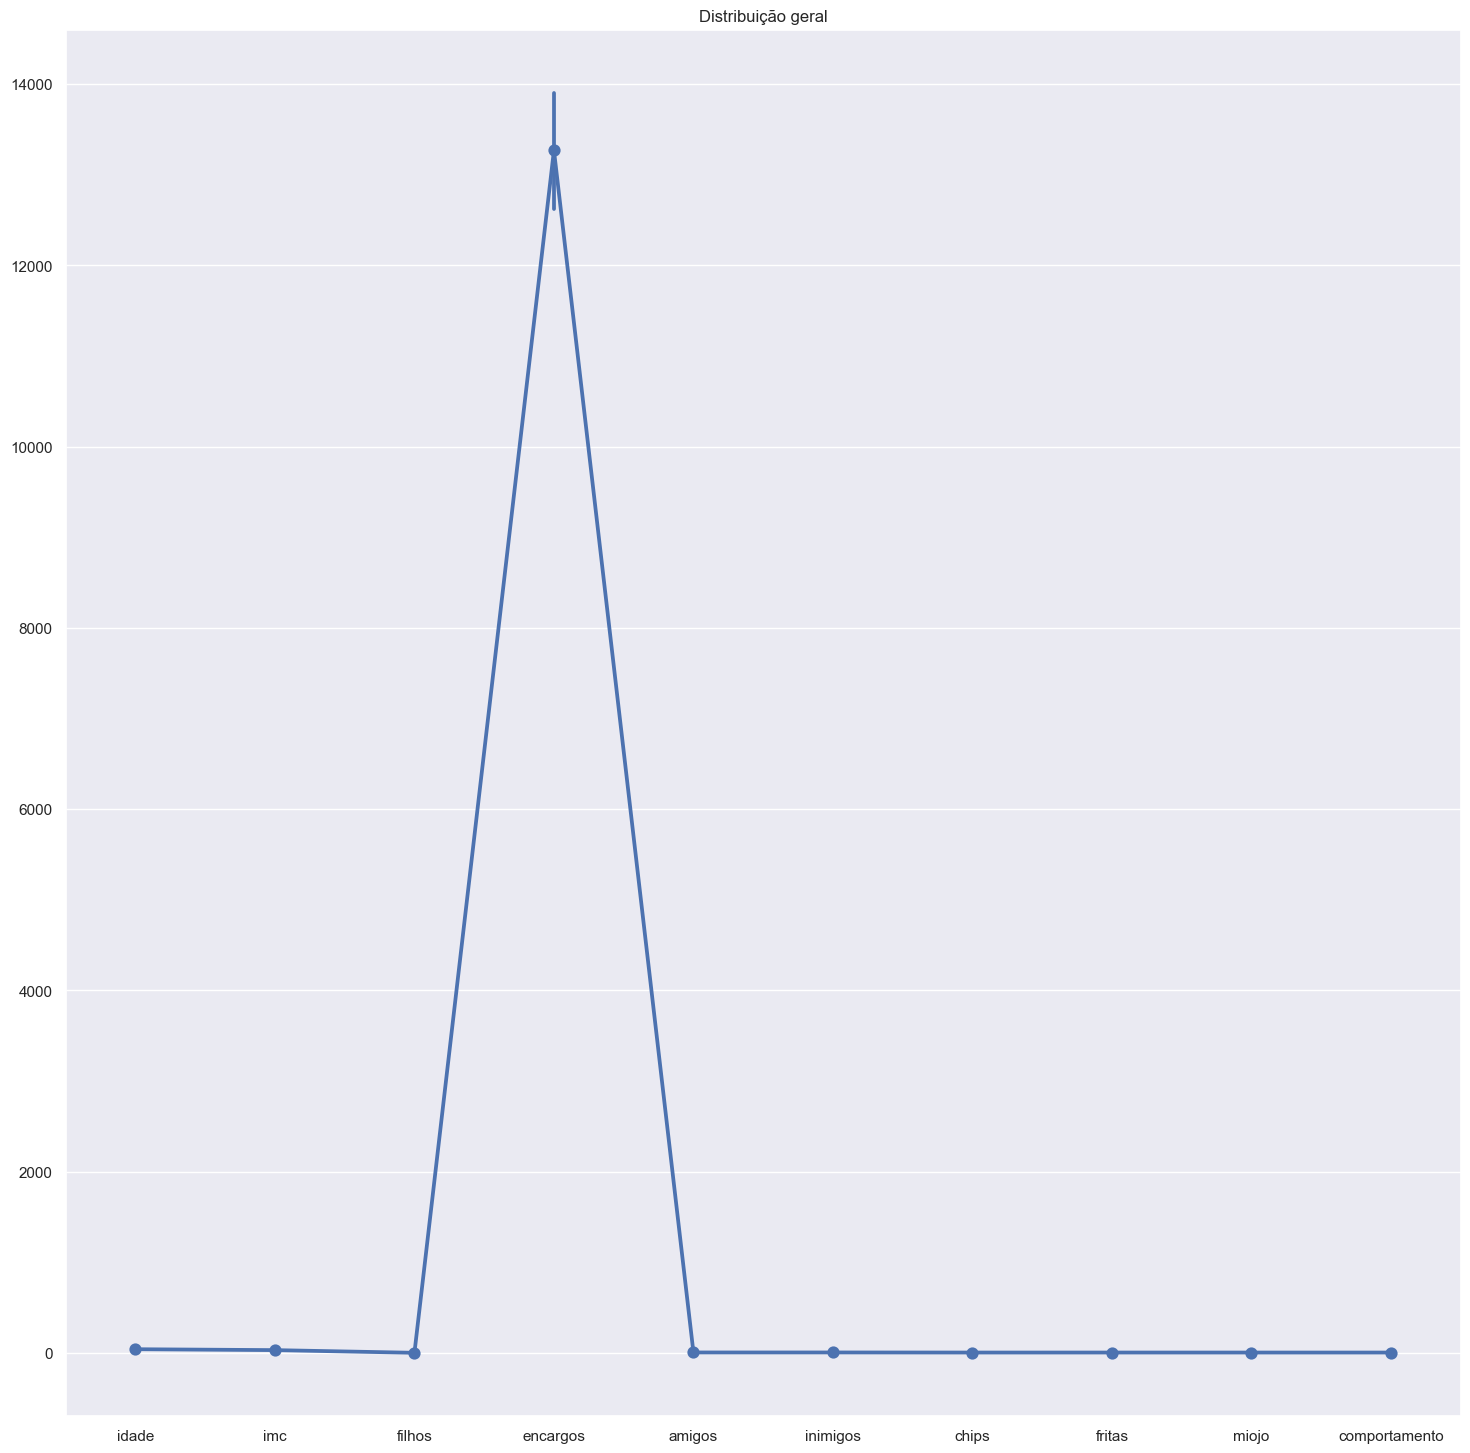

In [33]:

# Valores gerais
plt.figure(figsize=(18,18))
sns.pointplot(insurance_dataset)
plt.title('Distribuição geral')
plt.show()

## Correlação

Antes de montar o mapa de correlação, gerar um dataset sem literais(variáveis categóricas).
Uma primeira conversão sem limpeza..

In [34]:
ins_sem_literal = insurance_dataset.copy()
# Encode SEXO, FUMANTE e REGIÃO
# O modelo só recebe números, por isso o Label Encoder faz uma representação de numeros para stirngs/obj
# Importante se atentar que as variáveis são restritas (categorias) , pois o Label Encoder faz uma numeração 'Burra'
le = LabelEncoder()
for col in ins_sem_literal.columns:
    if ins_sem_literal[col].dtype == 'object':
        ins_sem_literal[col] = le.fit_transform(ins_sem_literal[col])
        for classe, valor in zip(le.classes_, range(len(le.classes_))):
                print(f'  {classe} → {valor}')

  feminino → 0
  masculino → 1
  nao → 0
  sim → 1
  centro → 0
  nordeste → 1
  noroeste → 2
  sudeste → 3
  sudoeste → 4


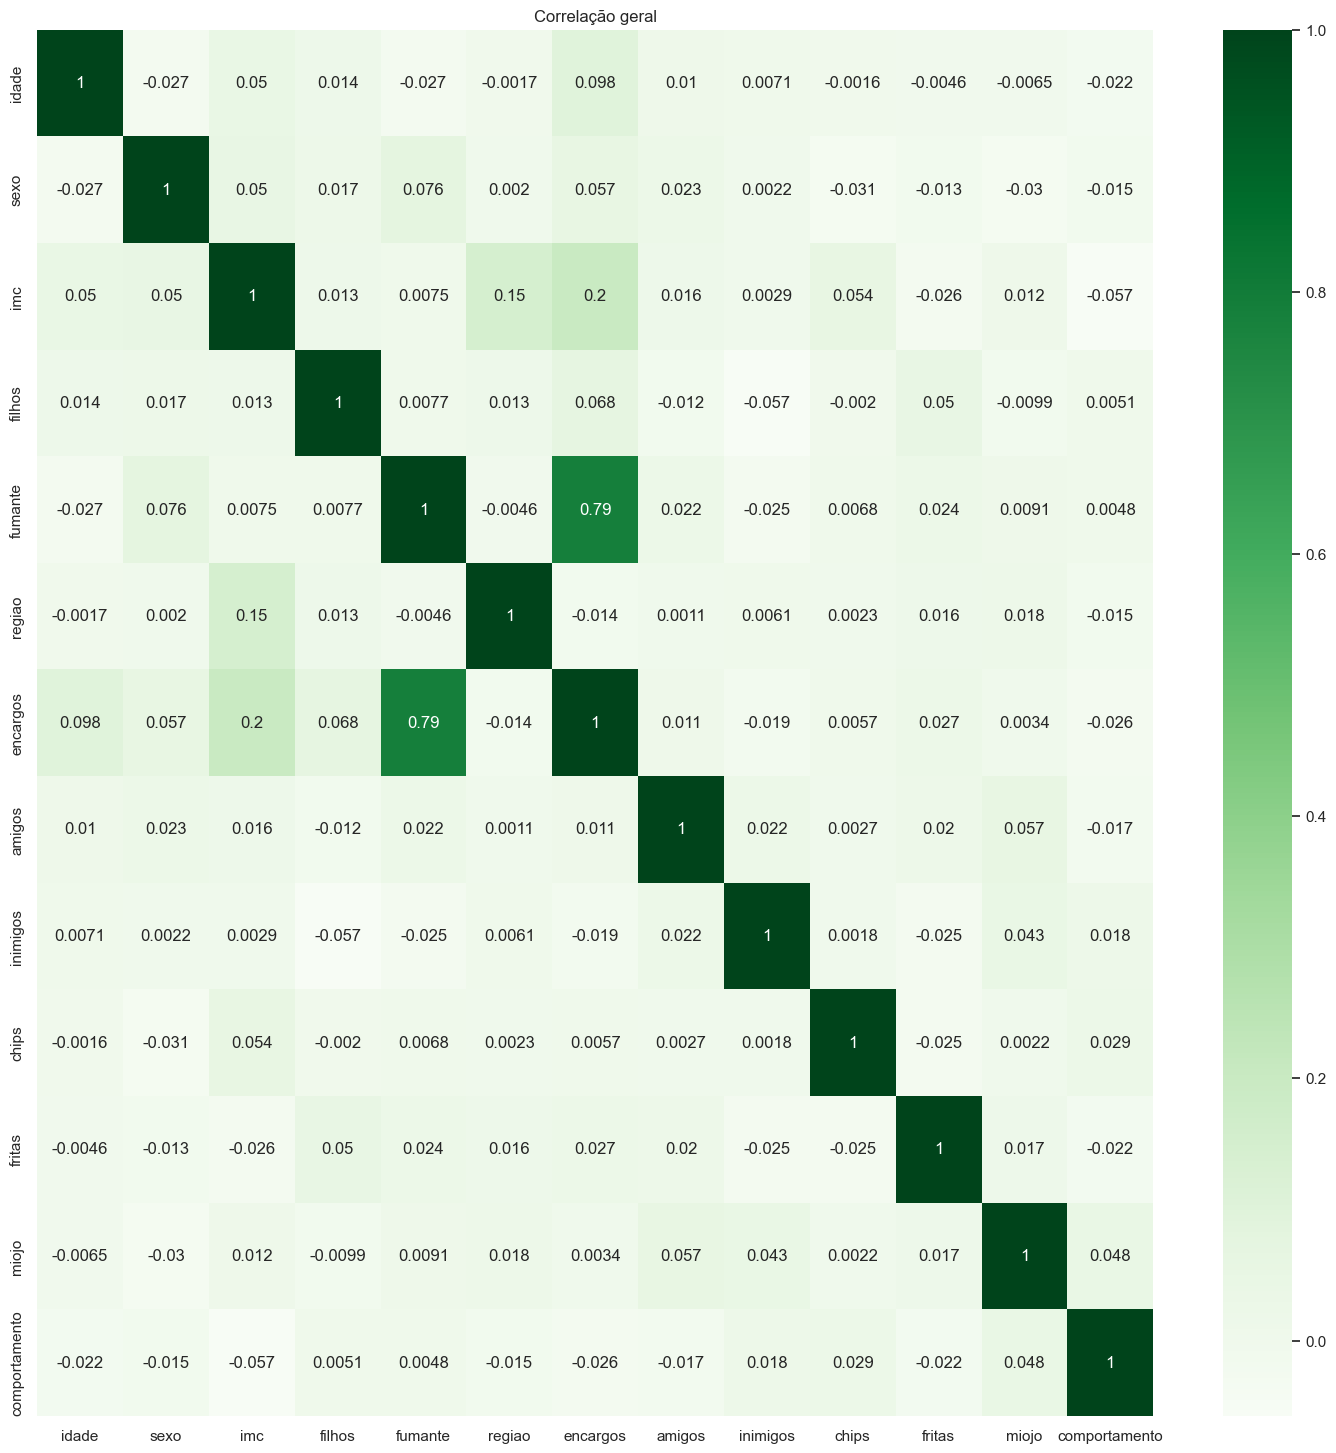

In [35]:
plt.figure(figsize=(18,18))
sns.heatmap(ins_sem_literal.corr(), annot=True, cmap='Greens')
plt.title('Correlação geral')
plt.show()

## Ajustes no dataset

- remover idades = -3. 999, 499, 500 ,111
- IMC com linhas nulas -> afeta o resultado
- O dataset limpo é gravado como insurance_fase1 que possui os literais e ins_sem_literal já transformado.

### Ajustes de idade

In [36]:
insurance_fase1 = ins_sem_literal.copy()
# Removendo as linhas com as idades especificadas
idades_del = [-3, 2, 103, 111, 499, 500, 999]
# A propriedade IS IN pega todos os registros de idade iguais a lista
# O ~ é negação. Inverte todos os booleanos do anterior, ficando TRUE os que não são as idades.
# Finalmente leva para o dataset somente os index true.
insurance_fase1 = insurance_fase1[~insurance_fase1['idade'].isin(idades_del)]

In [37]:
# Remove todas as linhas que contenham algum campo nulo. No caso, só na coluna IMC tem nulos.
insurance_fase1.dropna(axis=0, how='any', inplace= True)

### visualização dos dados corrigidos

In [38]:
# Apresenta o total de linhas agora
insurance_fase1.shape

(1320, 13)

In [39]:
# Apresenta as primeiras 5 linhas apos a limpeza
insurance_fase1.head()

,idade,sexo,imc,filhos,fumante,regiao,encargos,amigos,inimigos,chips,fritas,miojo,comportamento
1,18,1,33.770,1,0,3,1725.55230,0,1,4,4,4,3
2,28,1,33.000,3,0,3,4449.46200,9,3,5,2,1,3
3,33,1,22.705,0,0,2,21984.47061,5,10,4,3,2,4
4,32,1,28.880,0,0,2,3866.85520,4,3,4,4,1,7
5,31,0,25.740,0,0,3,3756.62160,6,10,6,7,4,4


### Plotando novamente os dados e comparando com os anteriores 

Esquerda antes - Direita depois

#### Encargos x Idade

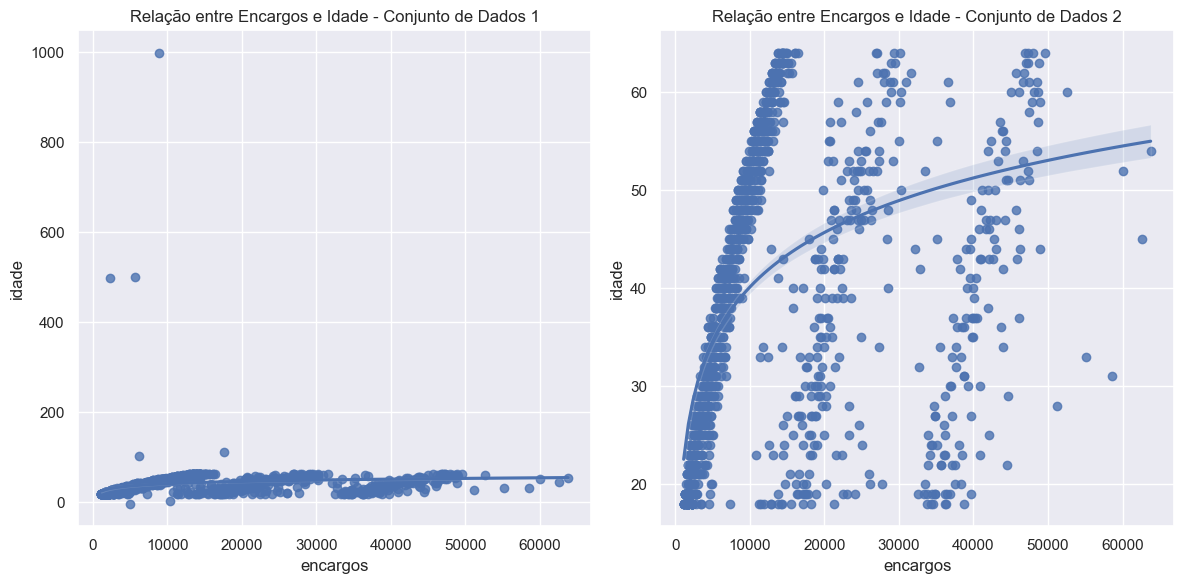

In [43]:
# Criando a figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotando o primeiro gráfico
sns.regplot(data=insurance_dataset, x="encargos", y="idade", logx=True, ax=ax1)
ax1.set_title("Relação entre Encargos e Idade - Conjunto de Dados 1")

# Plotando o segundo gráfico
sns.regplot(data=insurance_fase1, x="encargos", y="idade", logx=True, ax=ax2)
ax2.set_title("Relação entre Encargos e Idade - Conjunto de Dados 2")

plt.tight_layout()
plt.show()

#### Idade

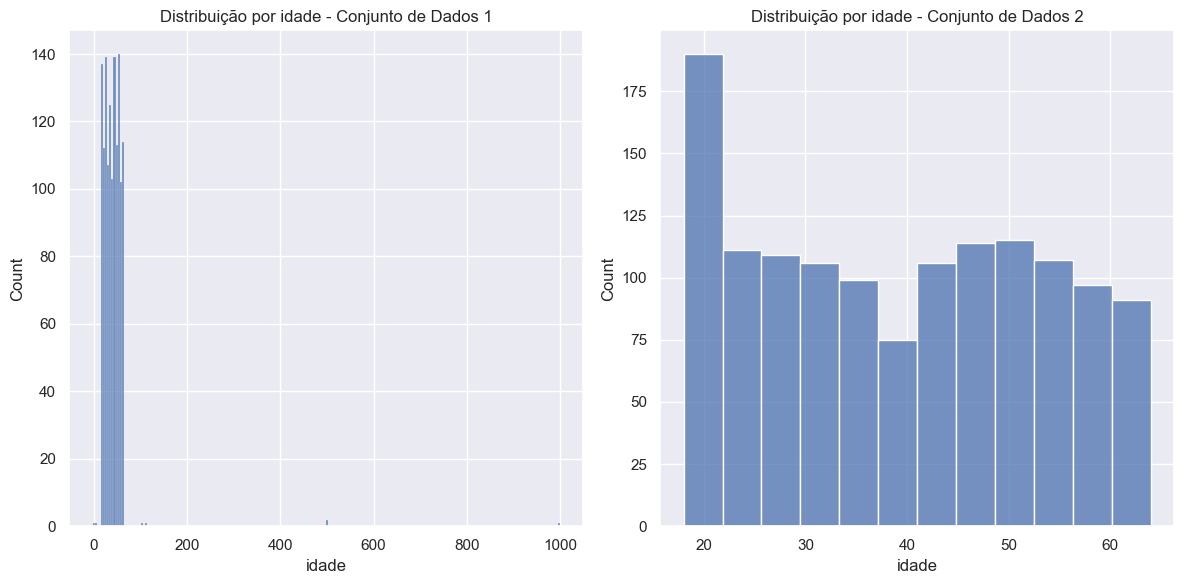

In [44]:

# distribuição da idade
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotando o primeiro gráfico
sns.histplot(insurance_dataset['idade'], ax=ax1)
ax1.set_title("Distribuição por idade - Conjunto de Dados 1")

# Plotando o segundo gráfico
sns.histplot(insurance_fase1['idade'], ax=ax2)
ax2.set_title("Distribuição por idade - Conjunto de Dados 2")

plt.tight_layout()
plt.show()

#### IMC

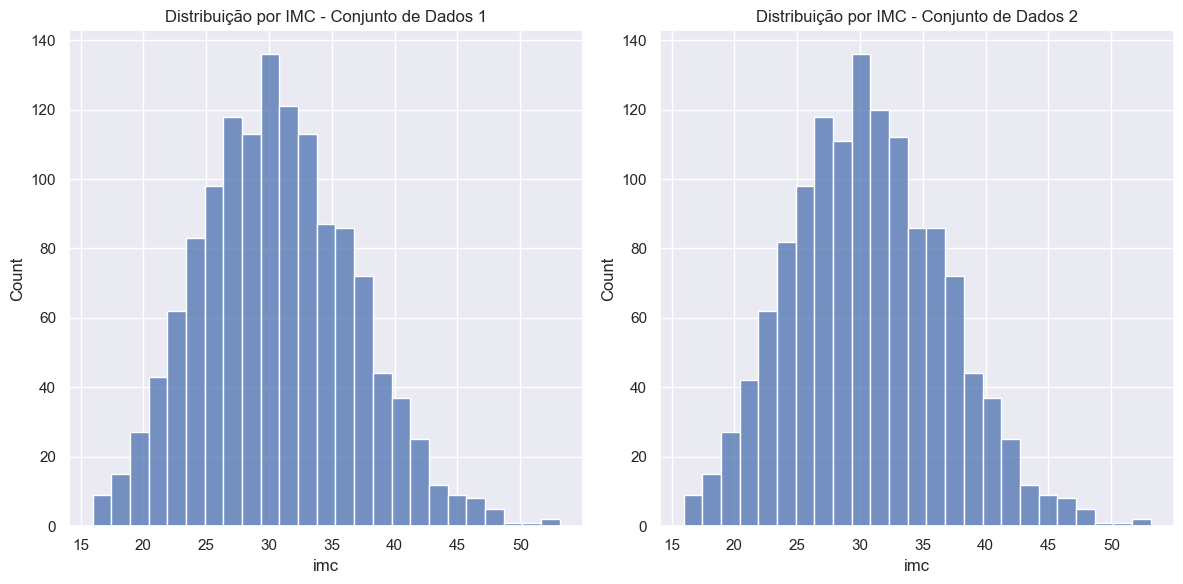

In [45]:
# distribuição por imc
#Normal IMC na faixa de → 18.5 até 24.9
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotando o primeiro gráfico
sns.histplot(insurance_dataset['imc'], ax=ax1)
ax1.set_title("Distribuição por IMC - Conjunto de Dados 1")

# Plotando o segundo gráfico
sns.histplot(insurance_fase1['imc'], ax=ax2)
ax2.set_title("Distribuição por IMC - Conjunto de Dados 2")

plt.tight_layout()
plt.show()

#### Mapa de Correlação

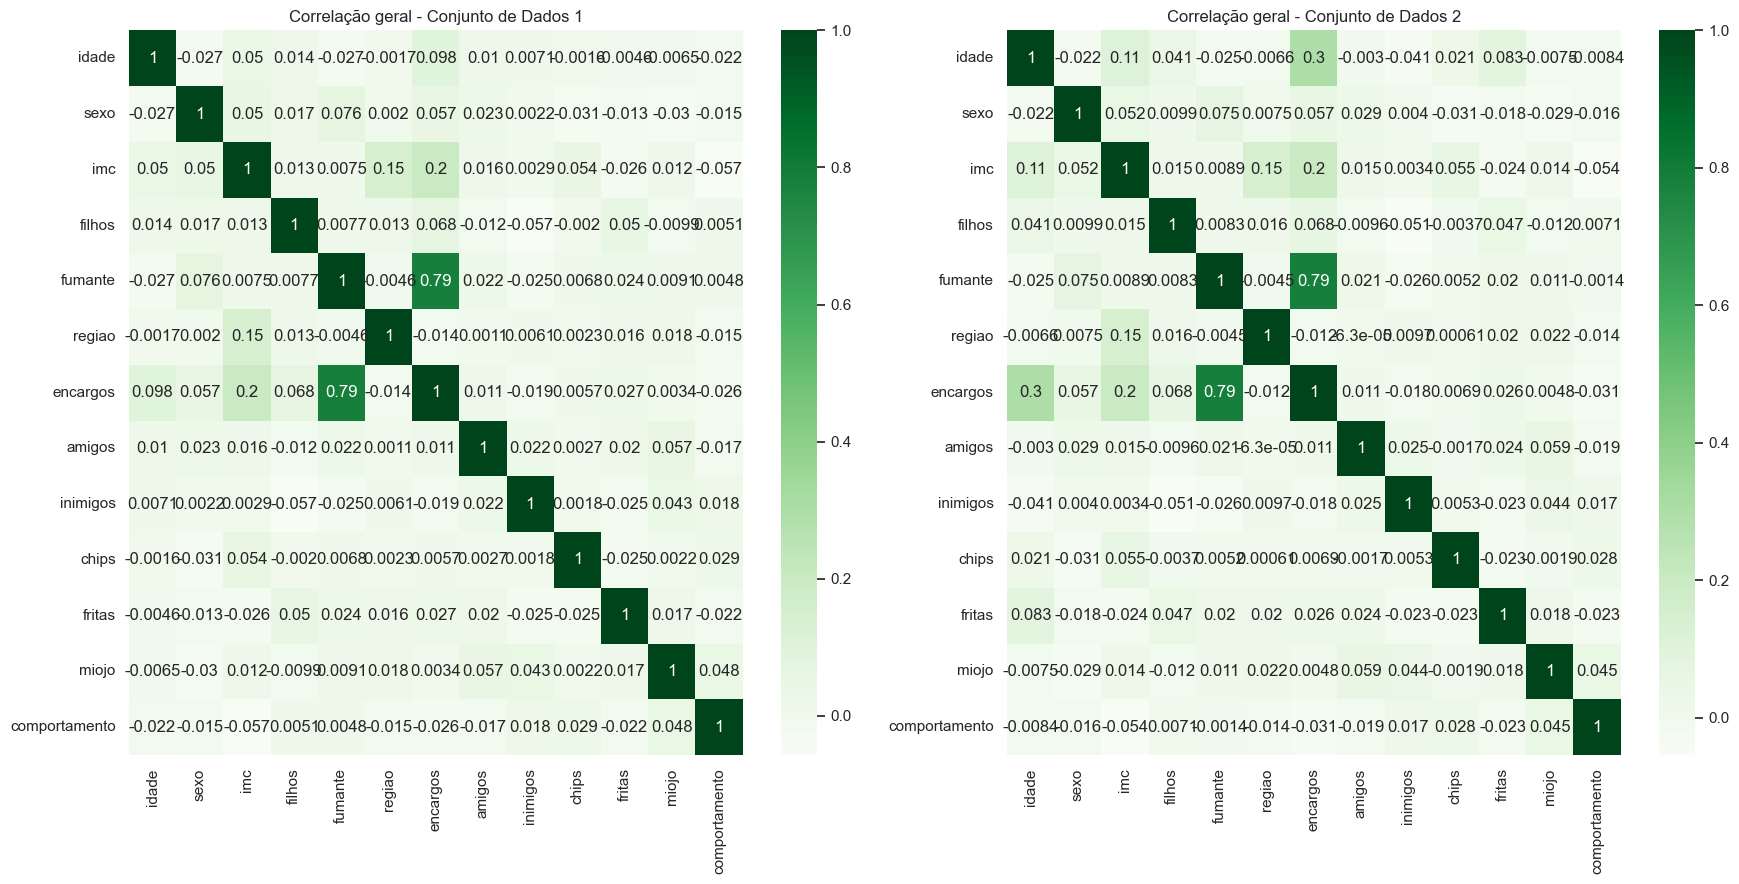

In [46]:
# Mapa para correlação entre colunas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Plotando o primeiro gráfico
sns.heatmap(ins_sem_literal.corr(), annot=True, cmap='Greens', ax=ax1)
ax1.set_title("Correlação geral - Conjunto de Dados 1")

# Plotando o segundo gráfico
sns.heatmap(insurance_fase1.corr(), annot=True, cmap='Greens', ax=ax2)
ax2.set_title("Correlação geral - Conjunto de Dados 2")

plt.tight_layout()
plt.show()

No mapa de Correlação é possível ver, que após os ajustes a feature 'idade' teve um aumento significativo (0,098 para 0,3) em relação ao target Encargo.

Portanto Idade, Imc, Fumante são variáveis que "pesam muito" na variação dos encargos.

## Implementação do Modelo Regressão

y -> target, o que queremos buscar = Encargos

x -> features, outras variáveis

In [47]:
# features
X = insurance_fase1.drop(columns='encargos', axis=1)


# target
Y = insurance_fase1['encargos']

### Divisão Treino e Teste

In [48]:
#separa para treino 80% e teste 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
view_train_test = f"""quantidade de linhas X: {X.shape[0]} linhas || quantidade de treino X treino: {X_train.shape[0]} linhas || quantidade de treino X teste: {X_test.shape[0]} linhas"""
view_train_test

'quantidade de linhas X: 1320 linhas || quantidade de treino X treino: 1056 linhas || quantidade de treino X teste: 264 linhas'

### Carrega o modelo de regressão

In [50]:

regressor = LinearRegression()
regressor.fit(X_train, Y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

Sobre R2 _score

1.0: Previsão perfeita.
0.0: O modelo não explica nenhuma variabilidade.
Negativo: O modelo é pior do que simplesmente prever a média.

### TRAIN

In [51]:
# Efetivando os treinos
training_data_previsao = regressor.predict(X_train)
# metrics.r2_score -> mede a qualidade da regressão
r2_train = metrics.r2_score(Y_train, training_data_previsao)
print('R**2 treino : ', r2_train)

R**2 treino :  0.7635651088920332


### TEST

In [52]:
# efetivando os testes
test_data_previsao =regressor.predict(X_test)
# Idem
r2_test = metrics.r2_score(Y_test, test_data_previsao)
print('R^2 teste : ', r2_test)

R^2 teste :  0.7067024745910114


In [53]:
resume_regression = f"Dados de teste tiveram uma acerto de {round(r2_test,2)*100}% e os dados de treino tiveram {round(r2_train,2)*100}%"

In [54]:
resume_regression

'Dados de teste tiveram uma acerto de 71.0% e os dados de treino tiveram 76.0%'

### Validação com um exemplo 

In [55]:
""" 
Ordem
1->idade, 
2->sexo, 
3->imc, 
4->filhos, 
5->fumante, 
6->regiao, 
7->amigos, 
8->inimigos, 
9->chips, 
10->fritas, 
11->miojo, 
12->comportamento

Categóricos -> numéricos:
    feminino → 0
    masculino → 1
    nao → 0
    sim → 1
    centro → 0
    nordeste → 1
    noroeste → 2
    sudeste → 3
    sudoeste → 4
"""
genero = ["feminino", "masculino"]
fumante = ["nao", "sim"]
regiao = ["centro","nordeste","noroeste","sudeste","sudoeste"]

input_vetor = [(31, 1, 25.74, 0, 1, 0, 7, 0, 1, 1, 1, 1),
               (29, 1, 35.00, 2, 0, 2, 2, 7, 6, 6, 3, 7),
               (45, 0, 44.74, 0, 1, 2, 5, 5, 5, 5, 5, 5),
               (18, 0, 53.04, 0, 0, 3, 6, 2, 3, 2, 3, 6),
               (55, 0, 30.43, 0, 0, 4, 10, 0, 1, 1, 1, 1)]

In [56]:
for lista in input_vetor:
    input_data = lista
    # converte input_data para um array numpy
    input_data_as_numpy_array = np.asarray(input_data)

    # Redefine o vetor
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    # Faz a previsão
    previsao = regressor.predict(input_data_reshaped)
#     print(previsao)
     # Mostra as previsões
    print('Os encargos para uma pessoa com ', input_data[0], ' anos, do sexo ', genero[input_data[1]],' com massa corporal de ',input_data[2],' com ',input_data[3], ' filhos, fumante ',fumante[input_data[4]], ' morador na região ', regiao[input_data[5]], ' irá ter o encargo em USD $', previsao[0])

Os encargos para uma pessoa com  31  anos, do sexo  masculino  com massa corporal de  25.74  com  0  filhos, fumante  sim  morador na região  centro  irá ter o encargo em USD $ 29972.28753273179
Os encargos para uma pessoa com  29  anos, do sexo  masculino  com massa corporal de  35.0  com  2  filhos, fumante  nao  morador na região  noroeste  irá ter o encargo em USD $ 6953.059476410706
Os encargos para uma pessoa com  45  anos, do sexo  feminino  com massa corporal de  44.74  com  0  filhos, fumante  sim  morador na região  noroeste  irá ter o encargo em USD $ 37689.86983116929
Os encargos para uma pessoa com  18  anos, do sexo  feminino  com massa corporal de  53.04  com  0  filhos, fumante  nao  morador na região  sudeste  irá ter o encargo em USD $ 9403.056844076234
Os encargos para uma pessoa com  55  anos, do sexo  feminino  com massa corporal de  30.43  com  0  filhos, fumante  nao  morador na região  sudoeste  irá ter o encargo em USD $ 12494.967569202656


## Modelo Regressão múltipla

### Dataset

In [57]:
df = insurance_fase1.copy()

### intercepto

In [58]:
df['Intercepto'] = 1
# Definir as variáveis independentes (X)
X = df[['Intercepto', 'idade', 'imc', 'sexo', 'filhos', 'fumante', 'regiao', 'amigos', 'inimigos', 'chips', 'fritas', 'miojo', 'comportamento']]

# Definir a variável dependente (Y)
Y = df['encargos']

In [59]:
# Criar e ajustar o modelo de regressão linear múltipla
modelo = sm.OLS(Y, X).fit()

In [60]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               encargos   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     330.6
Date:                Tue, 14 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:37:56   Log-Likelihood:                -13367.
No. Observations:                1320   AIC:                         2.676e+04
Df Residuals:                    1307   BIC:                         2.683e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercepto    -1.043e+04   1239.936     -8.409      0.000   -1.29e+04   -7994.114
idade           258.2526     12.064     21.407      0.000     234.585     281.920
imc             328.2205     28.038     11.706      0.000     273.215     383.226
sexo           -148.1266    336.842     -0.440      0.660    -808.936     512.683
filhos          492.4399    139.345      3.534      0.000     219.076     765.804
fumante        2.393e+04    416.048     57.523      0.000    2.31e+04    2.47e+04
regiao         -347.7333    151.044     -2.302      0.021    -644.048     -51.419
amigos          -25.3049     52.558     -0.481      0.630    -128.412      77.802
inimigos         65.2124     53.527      1.218      0.223     -39.795     170.220
chips           -76.4843     84.604     -0.904      0.366    -242.459      89.490
fritas          -80.2982     85.397     -0.940      0.347    -247.828      87.231
miojo           -11.3392     85.943     -0.132      0.895    -179.941     157.262
comportamento  -118.1083     84.460     -1.398      0.162    -283.800      47.584
==============================================================================
Omnibus:                      281.659   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              648.666
Skew:                           1.169   Prob(JB):                    1.39e-141
Kurtosis:                       5.516   Cond. No.                         389.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Realizar Previsões

In [87]:
y_pred = modelo.predict(X)

# Calcular MAE, MSE e RMSE
mae = mean_absolute_error(Y, y_pred)
mse = mean_squared_error(Y, y_pred)
rmse = np.sqrt(mse)

### MSA, MSE , RMSE

---
MAE (Erro Médio Absoluto - Mean Absolute Error)

O Erro Médio Absoluto (MAE) mede a média dos valores absolutos das diferenças entre os valores reais (Y) e os valores previstos (y_pred).
Um MAE mais baixo indica que o modelo está fazendo previsões mais próximas dos valores reais.

---
MSE (Erro Quadrático Médio - Mean Squared Error)

O Erro Quadrático Médio (MSE) calcula a média dos quadrados dos erros (diferenças entre valores reais e previstos).
Penaliza erros maiores de forma mais significativa por elevar as diferenças ao quadrado.

---
RMSE (Raiz do Erro Quadrático Médio - Root Mean Squared Error)

O RMSE é simplesmente a raiz quadrada do MSE. Ele traz o erro para a mesma escala dos valores de Y.
Assim como o MSE, mas em uma escala mais fácil de interpretar.

Essas métricas são usadas para avaliar a performance de modelos de regressão. Quanto menores esses valores, melhor o modelo está prevendo os resultados.

In [88]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 4187.230790681157
MSE: 36608518.18116458
RMSE: 6050.497349901459


MAE

Em média, o modelo erra cerca de 4187.23 unidades em cada previsão.
O MAE mede o erro de forma linear, considerando a média dos erros absolutos, o que significa que cada erro tem o mesmo peso.
MSE

MSE indica que existem erros grandes no modelo, pois penaliza erros maiores de forma mais severa.
RMSE

O RMSE é a raiz do MSE e indica que, em média, o erro do modelo é de aproximadamente 6050.50 unidades

## PCA 

Análise de componentes principais (ACP).

Redução de dimensionalidade linear usando Decomposição de Valor Singular dos dados para projetá-los em um espaço dimensional inferior. 

### Dataset

In [1]:
df = insurance_fase1.copy()

# A seguir, separaremos todas as colunas na lista de ‘recursos’ para uma variável ‘X’ e a variável ‘destino’ para ‘y’.
features = ['idade', 'sexo', 'imc', 'fumante', 'filhos', 'regiao', 'amigos', 'inimigos', 'chips', 'fritas', 'miojo', 'comportamento']
X = df[['idade', 'sexo', 'imc', 'fumante', 'filhos', 'regiao', 'amigos', 'inimigos', 'chips', 'fritas', 'miojo', 'comportamento']] .values
y = df['encargos'].values

NameError: name 'insurance_fase1' is not defined